### A. Bayes' theorem:

$$P(X|D)=\frac{P(D|X)P(X)}{P(D)}=\frac{P(D|X)P(X)}{\int P(D|X)P(X) dX}$$

where $X$ are the parameters of the model and $D$ is the data. 

- $P(X)$: prior function


- $P(D|X)$: likelihood function


- $P(D)$: evidence


- $P(X|D)$: posterior function

### B. Markov Chain Monte Carlo (MCMC)

#### Goal: sampling posterior distribution

#### (i) Compositions:

#### 1. Monte Carlo method

- Monte Carlo simulation: it solves a problem by generating random numbers.

#### 2. Markov chains

- Markov property: the memoryless property of a stochastic process

$$ P(X_{t+1}|X_{t}) = P(X_{t+1}|X_{t}, X_{t-1}, X_{t-2},…, X_{0}) $$

- Markov process: a stochastic process has the Markov property if the conditional probability distribution of future states of the process (conditional on both past and present states) depends only upon the present state, not on the sequence of events that preceded it. (https://en.wikipedia.org/wiki/Markov_property)

#### 3. Acceptance-rejection sampling

- Metropolis-Hasting algorithm (MH algorithm)

  (1) Give an initial state $X$ which is generated by **Monte Carlo method**

  (2) Guess the next state $X^{'}$ based on a proposal distribution (jumping distribution) $g(X^{'}|X)$ **$\Rightarrow$ Markov chains**

  (3) Calculate the **acceptance ratio** A($X^{'}$, $X$) 
  
  Metropolis choice:
  
  $$ A(X^{'}, X) = min\left ( 1, \frac{P\left ( X^{'}|D \right )}{P\left ( X|D \right )}\frac{g(X|X^{'})}{g(X^{'}|X)} \right ) = min\left ( 1, \frac{P\left ( D|X^{'} \right )P\left ( X^{'} \right )g\left ( X|X^{'} \right )}{P\left ( D|X \right )P\left ( X \right )g\left ( X^{'}|X \right )} \right )$$
  
  Assume the proposal distribution is symmetric: $g(X^{'}|X)=g(X|X^{'})$ 
  
  $\Rightarrow$ MH algorithm reduces to **Metropolis algorithm**
  
  $$ A(X^{'}, X) = min\left ( 1, \frac{P\left ( X^{'}|D \right )}{P\left ( X|D \right )} \right ) = min\left ( 1, \frac{P\left ( D|X^{'} \right )P\left ( X^{'} \right )}{P\left ( D|X \right )P\left ( X \right )} \right )$$
  
  (4) Generate a random number $u\in [0, 1]$ from **an uniform distribution**
  
     - $u \leq $  $A(X^{'}, X)$ $\Rightarrow$ we accept $X^{'}$ as the new state.
     
     - $u > $ $A(X^{'}, X)$ $\Rightarrow$ we reject $X^{'}$ as the new state.
     

$\quad \ \ $(5) Repeat the steps (1)~(4) again
  
         
- The No-U-Turn Sampler (Ref: https://arxiv.org/abs/1111.4246)

#### 4. Check for convergence

- If the randomly generated values converge to a reasonable distribution, then the distribution becomes our posterior distribution.

#### (ii) Derivation for MH algorithm ([Metropolis–Hastings algorithm](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm))

- Desired distribution: $P(X|D)$

- Stationary distribution: $\pi(X|D)$

If the following two conditions are satisfied, the Markov process has an unique stationary distribution $\pi(X|D)$ that is chosen to be $P(X|D)$.


- **Existence of stationary distribution**

  a sufficient but not necessssary condition: **detailed balance** 
  
  **Detailed balance:** each transition $ X \rightarrow X^{'}$ governed by the transition probability $P\left ( X^{'}|X \right )$ is reversible.
  
$$\pi \left ( X|D \right )P\left ( X^{'}|X \right )=\pi \left ( X^{'}|D \right )P\left ( X|X^{'} \right )$$


- **Uniqueness of stationary distribution**

  **Ergodicity** of the Markov process:
  
  (1) Every state must be **aperiodic**: the system does not return to the same state at fixed intervals.
  
  (2) Every state must be **positive recurrent**: the expected number of steps for returning to the same state is finite.
  

The condition of detailed balance:

$$P\left ( X^{'}|X \right )P \left ( X|D \right )=P\left ( X|X^{'} \right )P \left ( X^{'}|D \right )$$

$$\Rightarrow \frac{P\left ( X^{'}|X \right )}{P\left ( X|X^{'} \right )}=\frac{P\left ( X^{'}|D \right )}{P\left ( X|D \right )}$$


- **Proposal distribution $g\left (X^{'}|X \right )$**: the conditional probability of proposing a state $X^{'}$ given $X$.


- **Acceptance ratio $A(X^{'}, X)$**: the probability to accept the proposed state $X^{'}$.


The transition probability $P\left ( X^{'}|X \right )$ and $P\left ( X|X^{'} \right )$ can be written as

$$P\left ( X^{'}|X \right )=g\left (X^{'}|X \right )A(X^{'}, X)$$

$$P\left ( X|X^{'} \right )=g\left (X|X^{'} \right )A(X, X^{'})$$

So

$$\frac{A\left ( X^{'}|X \right )}{A\left ( X|X^{'} \right )}=\frac{P\left ( X^{'}|D \right )g\left ( X|X^{'} \right )}{P\left ( X|D \right )g\left ( X^{'}|X \right )}=\frac{P\left ( D|X^{'} \right )P\left ( X^{'} \right )g\left ( X|X^{'} \right )}{P\left ( D|X \right )P\left ( X \right )g\left ( X^{'}|X \right )}\ (By\ Bayes’\ formula)$$

where the likelihood functions $P(D|X^{'})$ and $P(D|X)$ are also equivalent to

$$P(D|X^{'})=\prod_{i=1}^{n}f\left ( d_{i}|X^{'}\right )$$

$$P(D|X)=\prod_{i=1}^{n}f\left ( d_{i}|X \right )$$

Thus, the acceptance ratio **A** is
  
  $$ A(X^{'}, X) = min\left ( 1, \frac{P\left ( X^{'}|D \right )}{P\left ( X|D \right )}\frac{g(X|X^{'})}{g(X^{'}|X)} \right )=min\left ( 1, \frac{P\left ( D|X^{'} \right )P\left ( X^{'} \right )g\left ( X|X^{'} \right )}{P\left ( D|X \right )P\left ( X \right )g\left ( X^{'}|X \right )} \right )$$

For this Metropolis acceptance ratio **A**, either $A(X',X)=1$ or $A(X,X')=1$ and, either way, above condition is satisfied.


### C. Markov Chain Monte Carlo (MCMC) simulations (1)

#### 1. Dummy data

- Original data: $N\left ( \mu=10 ,\sigma=3  \right )$ with 50000 samples


- Observed data: $N\left ( \mu_{obs} ,\sigma_{current}  \right )$ with 1000 samples

For this simple case, we get $\mu_{obs}$ from the observed data and find the distribution of $\sigma_{current}$ $(X \in \left \{ \sigma_{current} \right \})$

- Proposal distribution $g\left ( X^{'}|X \right )$: $g\left ( \sigma_{new}| \sigma_{current} \right )=N\left ( \mu=\sigma_{current} ,\sigma^{'}=0.5  \right )$ **(Assume !)**

$$\sigma_{new}=g\left ( \sigma_{new}| \sigma_{current} \right )\sigma_{current}=N\left ( \mu=\sigma_{current} ,\sigma^{'}=0.5  \right )\sigma_{current}$$

[Note] This assumed proposal distribution affects the convergence time of the algorithm and the correlation between samples.

- Probability density function (PDF) for each data point $d_{i}$ in the dataset D:

$$f\left ( d_{i}|\sigma_{current} \right )=\frac{1}{\sqrt{2\pi \sigma^{2}_{current}}}\ exp\left ( {-\frac{\left ( d_{i}-\mu_{obs} \right )^{2}}{2\sigma^{2}_{current}}} \right )$$

- Likehihood function $P\left ( D|X \right)$:

$$P\left (D|\sigma_{current} \right )=\prod_{i=1}^{n}f\left ( d_{i}|\sigma_{current} \right )$$

- Prior function $P\left ( X \right)$: $P\left ( \sigma_{current} \right)$ with the constraint $\sigma_{current} > 0$


- Acceptance ratio $A(X^{'}, X)$:

$$A(\sigma_{new}, \sigma_{current}) = min\left ( 1, \frac{P\left ( \sigma_{new}|D \right )}{P\left ( \sigma_{current}|D \right )}\frac{g(\sigma_{current}|\sigma_{new})}{g(\sigma_{new}|\sigma_{current})} \right )=min\left ( 1, \frac{P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )g\left ( \sigma_{current}|\sigma_{new} \right )}{P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right )g\left ( \sigma_{new}|\sigma_{current} \right )} \right )$$

For the symmetric proposal distribution (Metropolis algorithm), acceptance ratio $A$ becomes 
  
$$A(\sigma_{new}, \sigma_{current}) = min\left ( 1, \frac{P\left ( \sigma_{new}|D \right )}{P\left ( \sigma_{current}|D \right )} \right )=min\left ( 1, \frac{P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )}{P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right )} \right )$$

Based on the numerical stability of our computation, we use log form of likehihood and prior function. The acceptance-rejection sampling can re-expressed as

(i) If $P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )/\left ( P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right ) \right ) \geq 1$, we accept $\sigma_{new}$.

$$\frac{\prod_{i=1}^{n}f\left ( d_{i}|\sigma_{new} \right )P\left ( \sigma_{new} \right )}{\prod_{i=1}^{n}f\left ( d_{i}|\sigma_{current} \right )P\left ( \sigma_{current} \right )} \geq 1$$

$$\Rightarrow \sum_{i=1}^{n}\left [ -log\left ( \sigma_{new}\sqrt{2\pi } \right )-\frac{\left ( d_{i}-\mu _{obs} \right )^{2}}{2\sigma_{new}^{2}} \right ]+log\left ( P\left ( \sigma_{new} \right ) \right ) \geq \sum_{i=1}^{n}\left [ -log\left ( \sigma_{current}\sqrt{2\pi } \right )-\frac{\left ( d_{i}-\mu _{obs} \right )^{2}}{2\sigma_{current}^{2}} \right ]+log\left ( P\left ( \sigma_{current} \right ) \right )$$

(ii) If $P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )/\left ( P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right ) \right ) < 1$, we generate a random number $u\in [0, 1]$ from **an uniform distribution**.
  
   - $u \leq $  $P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )/\left ( P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right ) \right )$ $\Rightarrow$ we accept $\sigma_{new}$.
     
   - $u > $ $P\left ( D|\sigma_{new} \right )P\left ( \sigma_{new} \right )/\left ( P\left ( D|\sigma_{current} \right )P\left ( \sigma_{current} \right ) \right )$ $\Rightarrow$ we reject $\sigma_{new}$.

**(1) Create original and observed data**

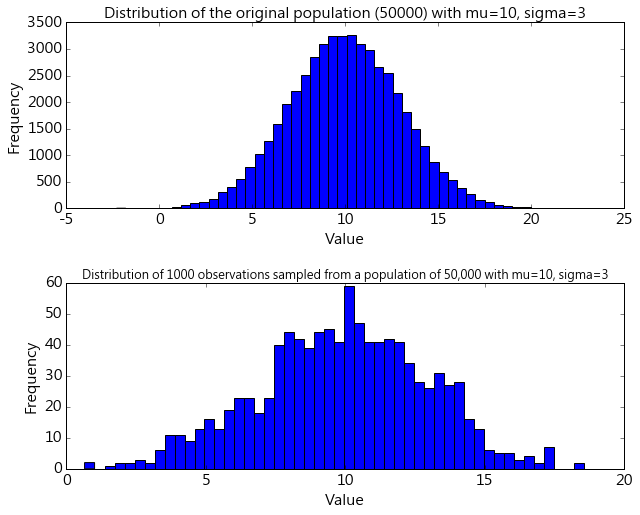

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

model = lambda t:np.random.normal(10, 3, t)

# Form a population of 50,000 individual, with average=10 and scale=3
population = model(50000)

# Assume we are only able to observe 1,000 of these individuals.
observation = population[np.random.randint(0, 50000, 1000)]

fig, ax = plt.subplots(2, 1, figsize = (10, 8))
plt.subplots_adjust(hspace = 0.4)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].hist(population, bins = 50)
ax[0].set_xlabel("Value", fontsize = 15)
ax[0].set_ylabel("Frequency", fontsize = 15)
ax[0].set_title("Distribution of the original population (50000) with mu=10, sigma=3", fontsize = 15)
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].hist(observation, bins = 50)
ax[1].set_xlabel("Value", fontsize = 15)
ax[1].set_ylabel("Frequency", fontsize = 15)
ax[1].set_title("Distribution of 1000 observations sampled from a population of 50,000 with mu=10, sigma=3", fontsize = 12)

**(2) Calculate the mean of observed data** $\bf{\mu}_{obs}$

In [2]:
mu_obs = observation.mean()
mu_obs

9.9092356006648732

**(3) Use the proposal distribution to calculate** $\sigma_{new}$

In [3]:
# The proposal_distribution defines how to move from sigma_current to sigma_new
proposal_distribution = lambda x: [x[0], np.random.normal(loc=x[1], scale=0.5, size=(1, ))]

**(4) Define the likelihood function (log form), prior function, acceptance and Metropolis-Hastings function**

In [4]:
# define the likelihood function (log form)
def log_likelihood(x, data):
    return np.sum(-np.log(x[1] * np.sqrt(2 * np.pi)) - ((data - x[0])**2) / (2 * x[1]**2))

'''
x[0] = mu_{obs}, x[1] = sigma (new or current)
returns 1 for all valid values of sigma (>0). Log(1)=0, so it does not affect the summation.
returns 0 for all invalid values of sigma (<=0). (Log(0)=-infinity, Log(negative number) => undefined)
'''
# define prior function
def prior(x):
    if(x[1] <= 0):
        return 0
    return 1

# Define whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new >= x:
        return True
    else:
        u = np.random.uniform(0, 1)
        return (u <= (np.exp(x_new - x)))

# Define M-H sampling
def metropolis_hastings(data, param_init, iterations, proposal_distribution, likelihood_function,
                        prior, acceptance_rule):
    x = param_init
    accepted = []
    rejected = []   
    
    for i in range(iterations):
        x_new =  proposal_distribution(x)    
        x_lik = likelihood_function(x, data)
        x_new_lik = likelihood_function(x_new, data) 
        
        if (acceptance(x_lik + np.log(prior(x)), x_new_lik + np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        
        else:
            rejected.append(x_new)            

    return np.array(accepted), np.array(rejected)

**(5) Compute M-H sampling and get the accepted and rejected $\sigma_{new}$**

In [5]:
accepted, rejected = metropolis_hastings(observation, [mu_obs, 0.2], 50000, proposal_distribution,
                                         log_likelihood, prior, acceptance)

**(6) Plot the points of accepted and rejected $\sigma_{new}$**

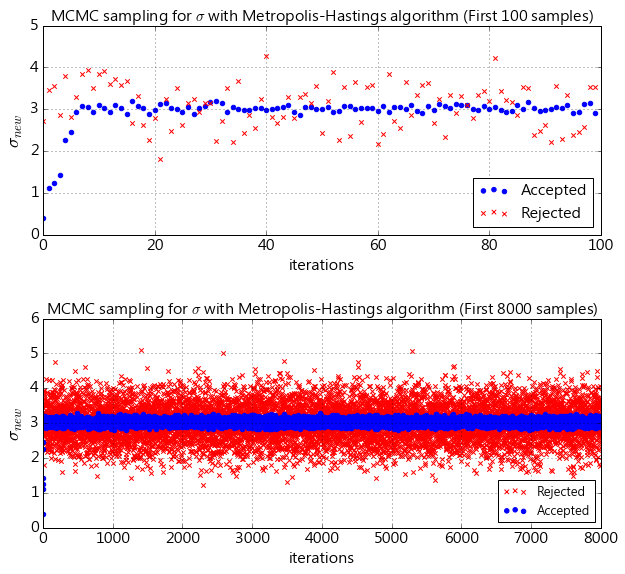

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.4)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].scatter(np.arange(100), accepted[:100, 1], color = 'b', label = "Accepted")
ax[0].scatter(np.arange(100), rejected[:100, 1], color = 'r', marker = 'x', label = "Rejected")
ax[0].set_xlabel("iterations", fontsize = 15)
ax[0].set_ylabel("$\sigma_{new}$", fontsize = 18)
ax[0].set_title("MCMC sampling for $\sigma$ with Metropolis-Hastings algorithm (First 100 samples)", fontsize = 15)
ax[0].set_xlim(0, 100)
ax[0].legend(loc = 'lower right', fontsize = 15)
ax[0].grid()
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].scatter(np.arange(8000), rejected[:8000, 1], color = 'r', marker = 'x', label = "Rejected")
ax[1].scatter(np.arange(8000), accepted[:8000, 1], color = 'b', label = "Accepted")
ax[1].set_xlabel("iterations", fontsize = 15)
ax[1].set_ylabel("$\sigma_{new}$", fontsize = 18)
ax[1].set_title("MCMC sampling for $\sigma$ with Metropolis-Hastings algorithm (First 8000 samples)", fontsize = 15)
ax[1].set_xlim(0, 8000)
ax[1].legend(loc = 'lower right', fontsize = 12)
ax[1].grid()
plt.show()

**(7) Plot the trace and histogram of accepted $\sigma_{new}$**

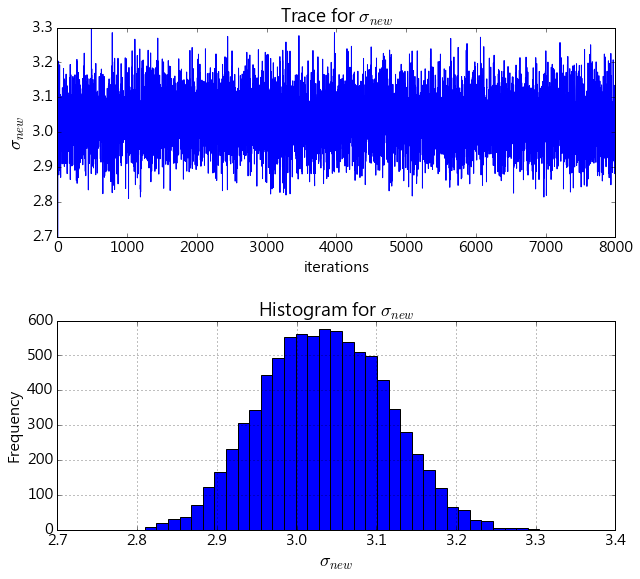

In [10]:
fig, ax = plt.subplots(2, 1, figsize = (10, 9))
plt.subplots_adjust(hspace = 0.4)
ax[0].tick_params(axis = 'both', labelsize = 15)
ax[0].plot(accepted[:8000, 1], color = 'b')
ax[0].set_xlabel("iterations", fontsize = 15)
ax[0].set_ylabel("$\sigma_{new}$", fontsize = 18)
ax[0].set_title("Trace for $\sigma_{new}$", fontsize = 18)
ax[0].set_xlim(0, 8000)
ax[0].set_ylim(2.7, 3.3)
ax[1].tick_params(axis = 'both', labelsize = 15)
ax[1].hist(accepted[:, 1], bins = 200)
ax[1].set_xlabel("$\sigma_{new}$", fontsize = 18)
ax[1].set_ylabel("Frequency", fontsize = 15)
ax[1].set_title("Histogram for $\sigma_{new}$", fontsize = 18)
ax[1].set_xlim(2.7, 3.4)
ax[1].grid()
plt.show()

**(8) Calculate the mean of accepted $\sigma_{new}$ and use it to create predicted data**

In [13]:
print(np.mean(accepted[:, 1]))
predicted_model = lambda t:np.random.normal(mu_obs, np.mean(accepted[:, 1]), t)
predictions = predicted_model(50000)

3.03403981989


**(9) Compare predicted data with the original data **

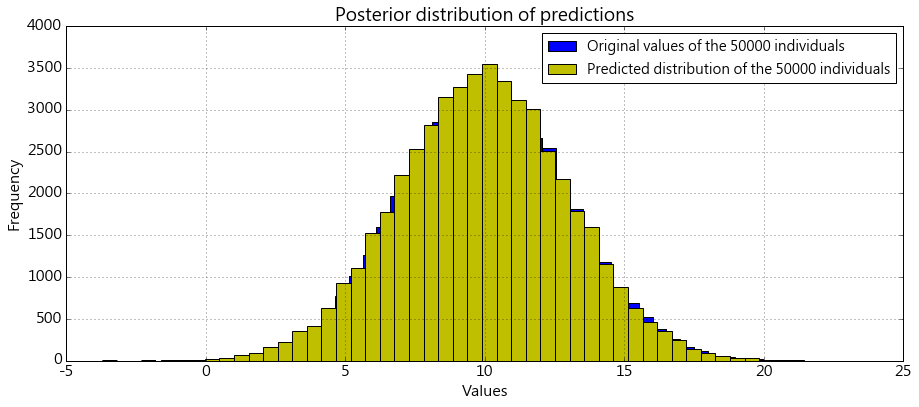

In [14]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.tick_params(axis = 'both', labelsize = 15)
ax.hist(population, bins = 50, label = "Original values of the 50000 individuals")
ax.hist(predictions, bins = 50, label = "Predicted distribution of the 50000 individuals", color = 'y')
ax.set_xlabel("Values", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)
ax.set_title("Posterior distribution of predictions", fontsize = 18)
ax.legend(loc = 'upper right', fontsize = 14)
ax.grid()
plt.show()

#### 2. Sunspots data

### D. Markov Chain Monte Carlo (MCMC) simulations (2): using Python pymc3 module

#### Import the modules

In [1]:
%matplotlib inline
import pymc3 as mc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns 

#### Sampling posterior distributions

(1) Create the model

In [2]:
mu = 10
s = 3
data = stats.norm(mu, s).rvs(1000)

with mc.Model() as model:
    mean = mc.Normal('mean', 5, sd = 0.5)
    sigma = mc.Normal('sigma', 5, sd = 0.3)
    X = mc.Normal('X', mu = mean, sd = sigma, observed = data)

# show the model variables
model.vars

[mean, sigma]

(2) Run the MCMC

In [3]:
with model:
    start = mc.find_MAP()
    step = mc.Metropolis()
    trace = mc.sample(60000, start = start, step = step)

start

logp = -2,612.4, ||grad|| = 12.041: 100%|██████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 1142.78it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mean]
Could not pickle model, sampling singlethreaded.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mean]
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 60500/60500 [00:16<00:00, 3665.35it/s]
The number of effective samples is smaller than 25% for some parameters.


{'mean': array(9.920109676734112), 'sigma': array(3.185333132762479)}

(3) Show the kernel-density estimates and MCMC sampling trace

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9EF5F8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EBA02E8>]], dtype=object)

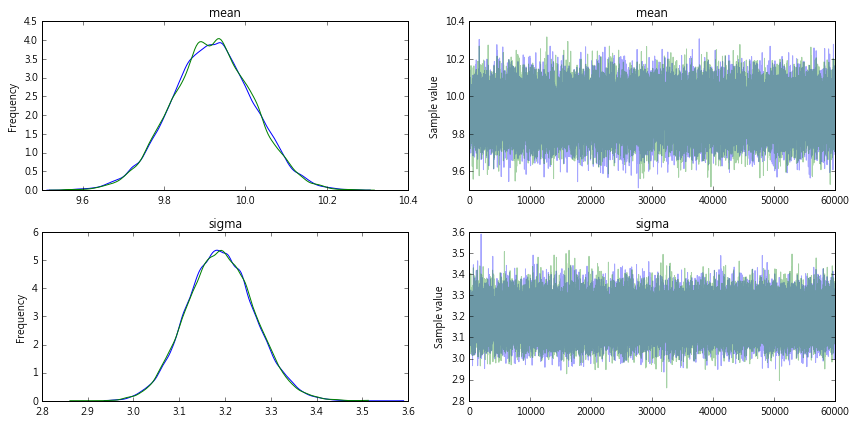

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), squeeze = False)
mc.traceplot(trace, ['mean', 'sigma'], ax = axes)

(4) Compare the mean and standard deviation of original data with MCMC results

In [5]:
print("(mu, mean) = ", (mu, trace.get_values('mean').mean()))
print("(s, sigma) = ", (s, trace.get_values('sigma').mean()))

(mu, mean) =  (10, 9.9191800643093782)
(s, sigma) =  (3, 3.1913717424749359)


(5) Show the information about mean and sigma

In [6]:
mc.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mean,9.919180,0.099781,0.000639,9.716294,10.106510,24646.0,0.999993
sigma,3.191372,0.073813,0.000517,3.049750,3.338011,24495.0,0.999992


**References:**

- [Markov Chain Monte Carlo](https://towardsdatascience.com/markov-chain-monte-carlo-291d8a5975ae)


- [From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings in Python](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a)


- [Numerical Python - Chapter 16: Bayesian statistics](https://nbviewer.jupyter.org/github/jrjohansson/numerical-python-book-code/blob/master/ch16-code-listing.ipynb)